<center><a href="https://imgbb.com/"><img src="https://i.ibb.co/jv1S903/Hnet-com-image.png" alt="Hnet-com-image" border="0"></a><center>

<h1><center>M504: Pipeline For Data Analysis</center></h1>
<h5><center>Submitted by: Faiz Qureshi, GH1018786
<h5><center>Module Leader: Prof. Mohammad Mahdavi

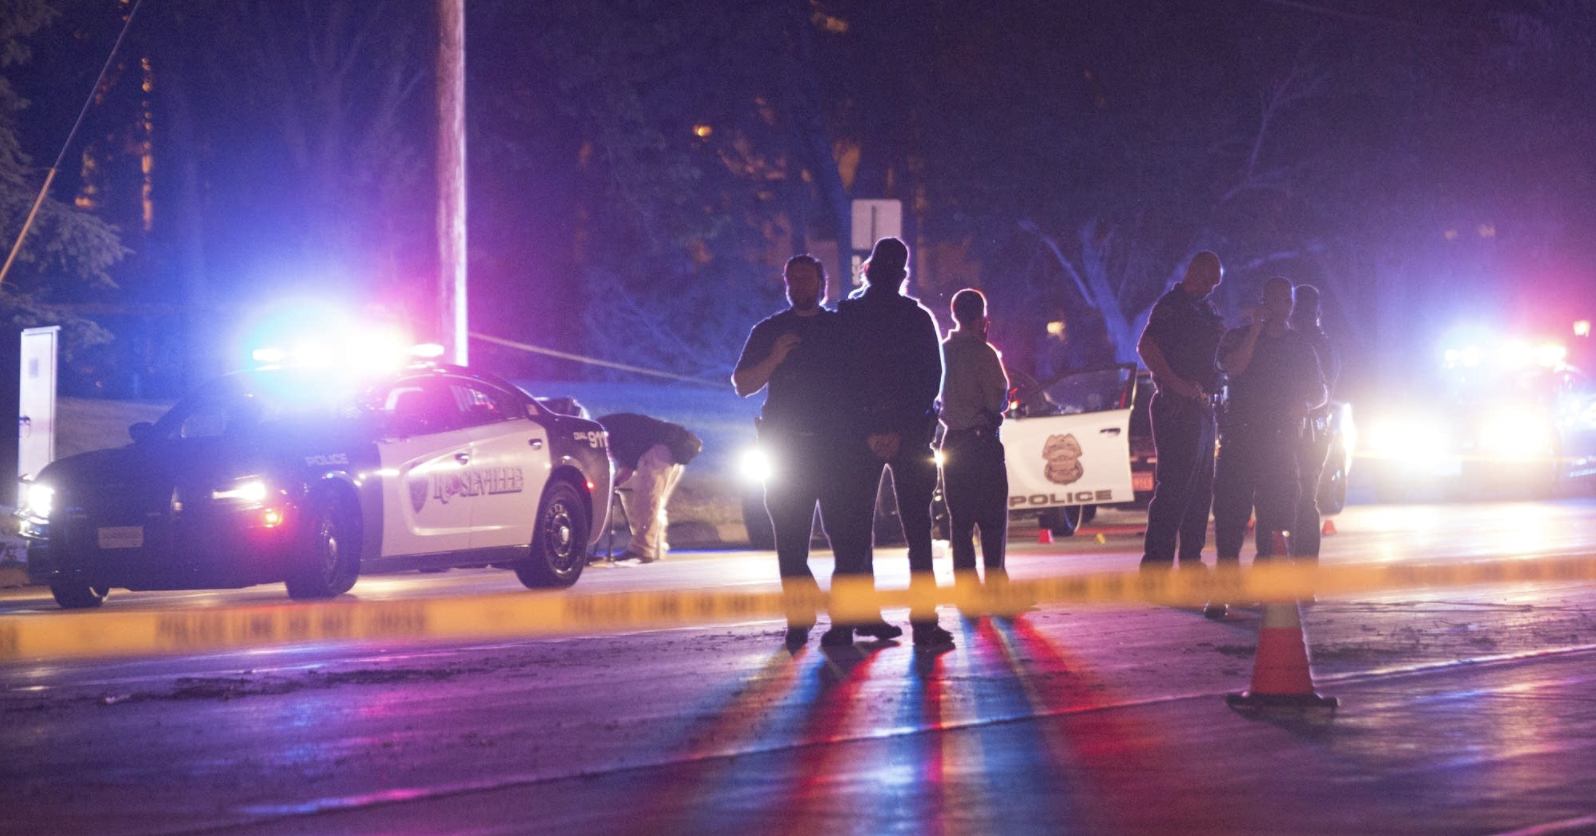

# Table of contents

- <a href='#1'>Context </a> 
- <a href='#2'>Our Role</a> 
- <a href='#3'>Questions </a> 
- <a href='#4'>Data Preparation </a> 
- <a href='#5'>Temporal Distribution</a>
- <a href='#6'>Geographic Distrbution </a> 
- <a href='#7'>Gender Distribution </a> 
- <a href='#8'>Age Distribution </a>
- <a href='#9'>Racial Distribution </a>
- <a href='#10'>Race vs Age and Gender </a>
- <a href='#11'>Racial Bias </a>
- <a href='#12'>Effect of Body Cam</a>
- <a href='#13'>Role of Mental Health </a>
- <a href='#14'>Inferences </a>
- <a href='#15'>Further Scope </a>
- <a href='#16'>References </a>


# <a id='1'> Context <a>


**The Client**

In the USA (and even other parts of the world) police brutality and the racial biases involved in it have made a lot of news in the past few years. Movements like 'Black Lives Matter' have sought to highlight the racism and mitigate this discrimination. Events like the death of George Floyd have put this issue front and center and there are a lot of numbers being thrown around to back different types of claims - both pro and anti police.

Our organization was recently contacted by Amnesty International. They are launching a new initiative to improve police accountability and racial justice. The initiative will be first launched as a pilot in North America followed by Europe, Middle East and Asia. For the same, they need our help to create an exploratory data anlaysis pipeline.


**The Data**

The client has provided us with data that has been gathered by the Washongton Post. Since 2015, Washington Post has relied on manual curation of data related to all victims of police shootings in the USA. This data captures the victims' race, age, gender and geo-location. Based on police reports and journalism, data about the victims' mental health, and details about the shooting are also captured. The data is frequently updated and has details of about 7000 victims.



# <a id='2'> Our Role <a>


Through this new initiative, Amnesty International first wishes to understand the status-quo. They want to propose pin-pointed systemic and governmental changes to improve police accountability. For this, they first need to understand if the challenges, biases and effects related to fatal police shootings. They can then leverage the gathered insights to propose appropriate responses.

Our role will initially be to guide them on this journey based on the data readily available. Over time, we will work with them to capture our own data, gather insights from it and use it for further modeling.

For this pilot, the initiative leaders have proposed a set of questions as a starting point. By gathering statistically backed answers these questions, they will be able to formulate appropriate actions.


# <a id='3'> Questions <a>


The following questions have been curated by the client to understand how police shootings in the US occur.
    
**Has there been an increase in the number of fatal shootings over time?**
- This is an obviously important question. Almost everyone would agree that a decline in this number is desirable.

**Is there a specific time of year when shootings are more frequent?**
- Can identify recurring spikes in fatal shootings. If there are spikes, we could try to identify the reasons for these spikes and plan mitigation accordingly.

**Are there regions in the US which are hotspots?**
- Can identify regional hotspots where shooutouts are more likely to occur. Client would naturally want to address these regions first.

**What percentage of vitims are from each Gender?**
- Gives insight about predominant charatersitics of likely victims.

**How old are the victims most likely to be?**
- Gives insight about predominant charatersitics of likely victims.

**What percentage of victims are from each race?**
- Gives insight about predominant charatersitics of likely victims. Can show how 

**Does the data reflect a bias towards a particular race?**
- Can be used to identify if racism is a factor in fatal shootings. If there is a bias, the factors explaining this bias will be very interesting to know as well.

**How do police bodycams affect the number of shootings?**
- Over the last few years police body cameras have become common and in many areas mandated. Having a body cam on means that details of the incident are objectively verifiable. As such, it is highly desirable to have them on.

**What effect does the victim's mental health play?**
- Can help identify links between shooting victims and mental health issue. Potential violent situations can be identified and de-escalated accordingly.


# <a id='4'> Data Preparation <a>


#### Import required packages

In [43]:
# Utilities
import os

# For data handling
import numpy as np
import pandas as pd

# To make API calls
import requests

# For plotting graphs
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#### Load and check the dataset

In [2]:
os.getcwd()

'/home/faizmohammedqureshi/Assessments'

In [3]:
data_path = '/home/faizmohammedqureshi/Assessments/Datasets/fatal-police-shootings-data.csv'
df = pd.read_csv(data_path)
df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

Loading is successful, let's see the number of rows and columns in our data:

In [4]:
df.shape

(7168, 17)

In [5]:
df.describe()

id          age    longitude     latitude
count  7168.000000  6776.000000  6458.000000  6458.000000
mean   3960.454939    37.131789   -97.112458    36.658912
std    2237.023593    12.922541    16.624128     5.383379
min       3.000000     6.000000  -160.007000    19.498000
25%    2012.750000    27.000000  -112.074750    33.476250
50%    3974.500000    35.000000   -94.251500    36.097000
75%    5904.250000    45.000000   -83.124750    40.001750
max    7808.000000    92.000000   -67.867000    71.301000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7168 non-null   int64  
 1   name                     6831 non-null   object 
 2   date                     7168 non-null   object 
 3   manner_of_death          7168 non-null   object 
 4   armed                    6959 non-null   object 
 5   age                      6776 non-null   float64
 6   gender                   7162 non-null   object 
 7   race                     5942 non-null   object 
 8   city                     7168 non-null   object 
 9   state                    7168 non-null   object 
 10  signs_of_mental_illness  7168 non-null   bool   
 11  threat_level             7168 non-null   object 
 12  flee                     6554 non-null   object 
 13  body_camera              7168 non-null   bool   
 14  longitude               

#### Handle missing values

In [7]:
def measure_missing_vals(df):
    """ 
    Generic function which scans a dataframe and 
    returns a value-sorted dictionary highlighting the columns with some percentage of missing values
    """
    pct_missing_vals = {}
    for col in df.columns:
        pct_missing = round(100 * df[col].isnull().sum()/len(df), 2)
        if pct_missing:
            pct_missing_vals[col] = pct_missing
    val_sorted_dict = {k: v for k, v in sorted(pct_missing_vals.items(), key=lambda x: x[1], reverse=True)}
    return val_sorted_dict

In [8]:
for col, pct_missing in measure_missing_vals(df).items():
    print(f'"{col}" has {pct_missing}% missing values')

"race" has 17.1% missing values
"longitude" has 9.91% missing values
"latitude" has 9.91% missing values
"flee" has 8.57% missing values
"age" has 5.47% missing values
"name" has 4.7% missing values
"armed" has 2.92% missing values
"gender" has 0.08% missing values


- Race can't be imputed on its own. We will use 'Unknown' as the replacement for missing values.

In [9]:
df['race'] = df['race'].fillna('Unknown')
df['race'].isnull().sum() == 0

True

- Missing longitude and latitude values can be imputed by geocoding
- For this, we will use Nominatin API, which is a free-to-use service
- First, we build a function to make the GET request to Nominatin

In [10]:
import requests
def get_lat_long(city, state='', country=''):
    """
    Makes a GET request to Nominatin to get lat and long details from city name
    """
    url = 'https://nominatim.openstreetmap.org/search?'
    url += f'city={city}&state={state}&country={country}&format=json&limit=1'
    rsp = requests.get(url).json()
    # At least one result was returned
    if rsp:
        return rsp[0]['lat'] + ',' + rsp[0]['lon']
    # Search returned no result
    else:
        return 'Not found'

- Let us check whether the rows with missing longitude and latitude coincide with each other
- We will use the bitwise XOR operator to check this
- If the boolean array only has False values after XOR, it means the rows completely overlap (since A XOR A is False and A XOR Not A is True)

In [11]:
(df['longitude'].isna() ^ df['latitude'].isna()).sum()

0

- Now we know we need to fetch both coordinates together for all rows with missing values
- Since each API call will be expensive in terms of the time it takes, we will copy the lat_long data to a new column
- Once wee have the data, we will fill in the missing values in the original latitude and longitude columns

In [12]:
df['lat_long'] = df.apply(lambda row: get_lat_long(row['city'], row['state'], 'USA')
                          if np.isnan(row['latitude']) else np.nan,
                          axis=1)

In [13]:
df.head()
df['lat_long'].isnull().sum()

6458

In [14]:
df['latitude'] = df.apply(lambda row: float(str(row['lat_long']).split(',')[0])
                          if (np.isnan(row['latitude']) and (row['lat_long']!='Not found'))
                          else row['latitude'],
                          axis=1)

df['longitude'] = df.apply(lambda row: float(str(row['lat_long']).split(',')[1])
                           if (np.isnan(row['longitude']) and (row['lat_long']!='Not found'))
                           else row['longitude'],
                           axis=1)

df.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact lat_long  
0  Not fleeing        False   -123.122    47.247                True      NaN  
1  Not fleeing        False   -122.892    45.487                True      NaN  
2  Not fleeing        False    -97.281    37.695                True      NaN  
3  Not fleeing        False   -122.422    37.763                True      NaN  
4  Not fleeing        False   -104.692    40.384                True      NaN

In [15]:
df['latitude'].isnull().sum(), df['longitude'].isnull().sum() 

(69, 69)

- Though it took about 5 minutes to fetch this information (since we had to make serial API calls), we were able impute about 90% of the missing values.
- For the remaining fields it is not stratightforward to impute the values and using a measure of central tendency does not really add any value for us.
- As such, we will let these remain - the respective rows will be ignored when we are visualing our data

#### Split the 'date' column for higher flexibility

- We will convert the date column from string to pd.datetime
- Then we will create additional granular columns
- This was we can easily group by weekday, month or year and visualize the data

In [16]:
df['date'] = pd.to_datetime(df['date'])
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week'] = df['date'].dt.weekday.replace(day_dict)
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [17]:
df.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   

  gender race           city state  ...         flee body_camera longitude  \
0      M    A        Shelton    WA  ...  Not fleeing       False  -123.122   
1      M    W          Aloha    OR  ...  Not fleeing       False  -122.892   
2      M    H        Wichita    KS  ...  Not fleeing       False   -97.281   
3      M    W  San Francisco    CA  ...  Not fleeing       False  -122.422   
4      M    H          Evans    CO  ...  Not fleeing       False  -104.692   

   latitude  is_geocoding_exact  lat_long  day_of_week day_of_month month  \
0    47.247                True       NaN       Friday            2     1   
1    45.487                True       NaN       Friday            2     1   
2    37.695                True       NaN     Saturday            3     1   
3    37.763                True       NaN       Sunday            4     1   
4    40.384                True       NaN       Sunday            4     1   

   year  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  

[5 rows x 22 columns]

#### Remap 'race' column to make it more descriptive
- When trying to draw insights from our data, it might not be immediately obvious to us which race is abbreviated which way.
- So, let us make it a more descriptive string rather than just an abbreviation.

In [18]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'Unknown', 'N'], dtype=object)


As per the <a href = "https://github.com/washingtonpost/data-police-shootings"> dataset documentation <a>:

- W: White, non-Hispanic
- B: Black, non-Hispanic
- A: Asian
- N: Native American
- H: Hispanic
- O: Other
- nan: unknown

In [19]:
race_map = dict(W='White', B='Black', A='Asian', N='NativeAm', H='Hispanic', O='Other')
df['race'] = df['race'].replace(race_map)
df['race'].value_counts()

White       3017
Black       1592
Unknown     1226
Hispanic    1089
Asian        106
NativeAm      91
Other         47
Name: race, dtype: int64

#### After data preparation, this is what our dataframe holds:

In [20]:
df.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   

  gender      race           city state  ...         flee body_camera  \
0      M     Asian        Shelton    WA  ...  Not fleeing       False   
1      M     White          Aloha    OR  ...  Not fleeing       False   
2      M  Hispanic        Wichita    KS  ...  Not fleeing       False   
3      M     White  San Francisco    CA  ...  Not fleeing       False   
4      M  Hispanic          Evans    CO  ...  Not fleeing       False   

  longitude  latitude  is_geocoding_exact  lat_long  day_of_week day_of_month  \
0  -123.122    47.247                True       NaN       Friday            2   
1  -122.892    45.487                True       NaN       Friday            2   
2   -97.281    37.695                True       NaN     Saturday            3   
3  -122.422    37.763                True       NaN       Sunday            4   
4  -104.692    40.384                True       NaN       Sunday            4   

  month  year  
0     1  2015  
1     1  2015  
2     1  2015  
3     1  2015  
4     1  2015  

[5 rows x 22 columns]


# <a id='5'> Temporal Distribution <a>


#### By day of week

In [21]:
plt_data = df.groupby(['day_of_week'])['id'].count().reset_index()

plt_data.columns = ['Day of Week', 'Number of shootings']

fig = px.bar(
    plt_data, 
    x='Day of Week', 
    y='Number of shootings',
    title='Shooting on each weekday', 
    width=800,
)
fig.update_traces(marker_color='orange', opacity=0.8)

fig.show()

#### By day of month

In [22]:
plt_data = df.groupby(['day_of_month'])['id'].count().reset_index()

plt_data.columns = ['Day of Month', 'Number of shootings']

fig = px.bar(
    plt_data, 
    x='Day of Month', 
    y='Number of shootings',
    title='Shooting on each day', 
    width=800,
)
fig.update_traces(marker_color='orange', opacity=0.8)

fig.show()

#### In different months

In [23]:
plt_data = df.groupby(['month'])['id'].count().reset_index()

plt_data.columns = ['Month', 'Number of shootings']

fig = px.bar(
    plt_data, 
    x='Month', 
    y='Number of shootings',
    title='Shooting in each month', 
    width=800,
)
fig.update_traces(marker_color='orange', opacity=0.8)

fig.show()

#### Over the last few years

In [24]:
plt_data = df.groupby(['year'])['id'].count().reset_index()

plt_data.columns = ['Year', 'Number of shootings']

fig = px.bar(
    plt_data, 
    x='Year', 
    y='Number of shootings',
    title='Shooting in each year', 
    width=800,
)
fig.update_traces(marker_color='orange', opacity= 0.8)

fig.show()

#### Line chart showing shootings each month

In [25]:
# First create the monthly counts for each month
shootings_each_month = pd.to_datetime(df['date']).dt.to_period('M').value_counts().sort_index()
shootings_each_month.index = pd.PeriodIndex(shootings_each_month.index)
# Convert it to back to a df
monthly_counts = shootings_each_month.rename_axis('month').reset_index(name='counts')
monthly_counts

month  counts
0   2015-01      76
1   2015-02      77
2   2015-03      92
3   2015-04      84
4   2015-05      71
..      ...     ...
82  2021-11      74
83  2021-12      89
84  2022-01      64
85  2022-02      74
86  2022-03      29

[87 rows x 2 columns]

In [26]:
fig = go.Figure(data=go.Scatter(x=monthly_counts['month'].astype(dtype=str), 
                        y=monthly_counts['counts'],
                        marker_color='orange'))
fig.update_layout({"title": 'Monthly shootings since January 2015',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Number of shootings", "showgrid": False},
                   "showlegend": False,
                   "plot_bgcolor": 'rgba(240,240,240,240)'})
fig.show()

- Shootings seems ot be more prevelant in earlier months of a year - Jan, Feb, March
- Year on year, there is a slight upward creep in number of shootings
- The 31st of the month has the fewest recorded shootings, which is explained by the fact that not all months have 31 days


# <a id='6'> Geographic Distribution <a>


#### ScatterGeo plot
- To present this information in an easy to digest way, we will first use a ScatterGeo plot
- We will be able to see the distribution of shootings on a map of USA.
- This will show us the geographic hotspots of the shootings.

In [45]:
# Copy necessary columns
plt_data = df[['longitude', 'latitude', 'race', 'age', 'name']].copy()

# Create text for hovering
plt_data['text'] = plt_data['name'] + ', ' + plt_data['race']

# Map race string to an int array to be used for colouring the markers
race_map = dict(White=1, Black=2, Asian=3, NativeAm=4, Hispanic=5, Others=6)
plt_data['race_number'] = plt_data['race'].apply(lambda x: race_map[x] if x in race_map else 0)
plt_data.head()

longitude  latitude      race   age                name  \
0   -123.122    47.247     Asian  53.0          Tim Elliot   
1   -122.892    45.487     White  47.0    Lewis Lee Lembke   
2    -97.281    37.695  Hispanic  23.0  John Paul Quintero   
3   -122.422    37.763     White  32.0     Matthew Hoffman   
4   -104.692    40.384  Hispanic  39.0   Michael Rodriguez   

                           text  race_number  
0             Tim Elliot, Asian            3  
1       Lewis Lee Lembke, White            1  
2  John Paul Quintero, Hispanic            5  
3        Matthew Hoffman, White            1  
4   Michael Rodriguez, Hispanic            5

In [46]:
# Now plot the data
fig = go.Figure(data=go.Scattergeo(
        lon=plt_data['longitude'],
        lat=plt_data['latitude'],
        text=plt_data['text'],
        mode='markers',
        marker=dict(size=7, opacity = 0.4, color=plt_data['race_number'])
        ))

fig.update_layout(title = 'Fatal Police Shootings<br>(Hover for details)', geo_scope='usa')
fig.show()

- It is evident that there are much more shooting near the east and west coasts, compared to middle America
- Let us compare this with an population density map of the USA:


![US Pop Density](https://upload.wikimedia.org/wikipedia/commons/9/90/USA-2000-population-density.gif)

- The distribution of shootings seems to correlaate with the population density, which is to be expected.

#### Distribution by states

In [29]:
plt_data=df['state'].value_counts().reset_index()
plt_data.columns = [
    'State', 
    'Count'
]

fig = go.Figure(go.Bar(
    x=plt_data['State'],y=plt_data['Count'],
    marker={'color': plt_data['Count'],'colorscale': 'deep'},  
))
fig.update_layout(title_text='Statewise deaths',xaxis_title="State",yaxis_title="Count",height=600,width=1000)
fig.show()

#### Top 50 cities

In [30]:
# Only considering top 50 cities for plot
plt_data=df['city'].value_counts().reset_index().head(50)



plt_data.columns = [
    'City', 
    'Count'
]

fig = go.Figure(go.Bar(
    x=plt_data['City'],y=plt_data['Count'],
    marker={'color': plt_data['Count'], 'colorscale': 'deep'},  
))
fig.update_layout(title_text='Citywise deaths',xaxis_title="City",yaxis_title="Count",height=600,width=1000)
fig.show()

- With this in perspective, the distribution of shootings does not seems to have a very large bias towards any particular region
- However, Los Angeles (and California), still seem to be slightly overrepresented.


# <a id='7'> Gender Distribution <a>


In [52]:
plt_data = df['gender'].value_counts().reset_index()

plt_data.columns = [
    'Gender', 
    'Count'
]

fig = px.pie(
    plt_data, 
    values='Count', 
    names='Gender',  
    title='Victims by Gender', 
    width=500, 
    height=500
)

fig.show()

- The data is largely skewed towards Males
- This is quite expected as statistically:
    - <a href="https://ucr.fbi.gov/crime-in-the-u.s/2014/crime-in-the-u.s.-2014/persons-arrested/main">men are much more likely to be victims <a>
    - <a href="https://pubmed.ncbi.nlm.nih.gov/1635092/">and perpatrators in violent ativities<a>
    
- In later sections we will see how gender the gender distribution is broken down by age and race


# <a id='8'> Age Distribution <a>


In [53]:
fig = px.histogram(
    df, 
    "age", 
    nbins=50, 
    title='Age distribution of victims',
    width=800
)

fig.update_traces(marker_color='orange', opacity= 0.8)
fig.show()


# <a id='9'> Racial Distribution <a>


In [54]:
plt_data = df['race'].value_counts().reset_index()

plt_data.columns = [
    'Race', 
    'Count',
]

plt_data = plt_data.sort_values('Count')

fig = px.bar(
    plt_data, 
    y='Race', 
    x='Count', 
    title='Racial distribution of shooting victims', 
    width=800,
)

fig.update_traces(marker_color='orange', opacity= 0.8)
fig.show()




# <a id='10'> Age vs Gender and Race <a>


- In this section, we will breakdown the age distribution of vitims by race and gender

In [55]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left")

col = 1
for name, gender in df.groupby('gender'):
    trace = go.Histogram()
    trace.name = name
    trace.x = (gender['age'])
    fig.add_trace(trace, row=1, col=col)
    col += 1
fig.show()


# <a id='10'> Race vs Age and Gender<a>


In [56]:
fig = make_subplots(rows=4, cols=2, start_cell="bottom-left")

row, col = 1, 1
for name, race in df.groupby('race'):
    trace = go.Histogram()
    trace.name = name
    trace.x = (race['age'])
    fig.add_trace(trace, row=row, col=col)
    row += 1
    if row == 5:
        row = 1
        col += 1
        
fig.show()


- For Black race, the peak occurs sooner (peak between 25 and 30)
- For White race, the peak occurs a bit later (peak between 30 and 35)
- For almost all races, the peak victim age is between 25 and 35


# <a id='11'> Racial Bias <a>


- To put the racial distribution into perspective, we will compare it with the distribution of different races in the general population.

- According to the US census (https://www.census.gov/quickfacts/US), the percentage of different races in the US is approximately:

    - White: 60.1%
    - Hispanic: 18.5%
    - Black: 13.4%
    - Asian: 5.9%
    - NativeAm: 1.3%
    - Other: 0.8%

In [57]:
# Remove rows with 'Unknown' race
plt_data = plt_data[plt_data['Race'] != 'Unknown']

# Normalize
plt_data['% Victims'] = 100 * plt_data['Count']/plt_data['Count'].sum()

# Add census data
plt_data['% Population'] = [0.8, 1.3, 5.9, 18.5, 13.4, 60.1]
plt_data

fig = px.bar(
    plt_data, 
    y='Race', 
    x=['% Population', '% Victims'], 
    title='Racial distribution (victims vs general population)', 
    width=800,
    barmode='group'
)
fig.show()


- From this graph, we can immediately see that:
    - Black and Hispanic races are overrepresented as victims
    - White and Asian races are underrepresented as victims


# <a id='12'> Role of bodycam <a>


In [37]:
fig = go.Figure()


cam_on = df[['id', 'race']][df['body_camera'] == True]
cam_on = cam_on.groupby(['race'])['id'].count().reset_index()
cam_on['% victims'] = 100 * cam_on['id']/cam_on['id'].sum()

cam_off = df[['id', 'race']][df['body_camera'] == False]
cam_off = cam_off.groupby(['race'])['id'].count().reset_index()
cam_off['% victims'] = 100 * cam_off['id']/cam_off['id'].sum()

trace = go.Bar()
trace.name = 'Body Camera On'
trace.y = cam_on['% victims']
trace.x = cam_on['race']
fig.add_trace(trace)

trace = go.Bar()
trace.name = 'Body Camera Off'
trace.y = cam_off['% victims']
trace.x = cam_off['race']
fig.add_trace(trace)
fig.show()

- A higher proportion of Black victims are shot with the camera on
- White victims are more likely to be shot with the camera off


# <a id='14'> Effect of victims' mental health <a>


In [39]:
plt_data = df['signs_of_mental_illness'].value_counts().reset_index()
plt_data.columns = ['Mental Illness', 'Count']

fig = go.Figure([go.Pie(labels=plt_data['Mental Illness'], values=plt_data['Count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', 
                  textfont_size=10,insidetextorientation='radial')

fig.update_layout(title="Was victim suffering from mental ilness?",title_x=0.5)
fig.show()

- In the general population, between <a href ="https://www.hopkinsmedicine.org/health/wellness-and-prevention/mental-health-disorder-statistics#:~:text=An%20estimated%2026%25%20of%20Americans,substance%20abuse%20and%20anxiety%20disorders.">20-25% of Americans suffer from some kind of mental health issues <a>
- As such, there doesn't seem to be a strong correlation between mental health issues and being shot by the police


# <a id='14'> Inferences <a>


The data collected by Wahsington Post is extremely useful and can highlight trends in fatal shootings as well as systemic biases that exist in USA. Through EDA, we were able to answer nearly all of our questions. A summary of what we found is below:


**Has there been an increase in the number of fatal shootings over time?**
- From the recorded data, there is a small increase in shootings year-on-year. The amount does not seem to be statistivally significant and external factors may explain this increase. There's also a possibility that since issues surrouning police violence have come to light, data is being recorded more vigilantly.

**Is there a specific time of year when shootings are more frequent?**
- Yes. Based on the data, the first quarter of the year seems to have a higher number of shootings compared to the rest. Months of January, February and March have about 15% extra shootings compared to rest of year. Also, interestingly September has fewest incidents.

**Are there regions in the US which are hotspots?**
- Yes. The west coast (California etc) had higher than normal prevelance of shootings.
- The south-west and mid-west regions have the lowest number of shootings, but this is expected since these areas of US are scarcely populated.
- Eastern and south-eastern US have a high number of shootings, which again seems to be roughly in line with their higher population density.

**What percentage of vitims are from each Gender?**
- The victims are 95% likely to be males. 
- This is in line with studies showing that males have a much higher predisposition towards violent behaviour and are more likely to physically escalate situation.

**How old are the victims most likely to be?**
- Most victims are between 25 to 35 years of age. The likeliness of being a victim falls slowly with age.
- It was also observed that Black victims were in general younger than their White couunterparts. Factors like unemployment, segeragation and poor public infrastructure could be causes of this.

**What percentage of victims are from each race?**
- Most victims are White, followed by Black and Hispanic.
- This is somewhat expected since these 3 races make up majority of American population.

**Does the data reflect a bias towards a particular race?**
- It does. Black victims are highly overrepresented compared to their presence in general population.
- Black victims represent almost 27% of victims even though they make up about 13% of the population.
- On the other hand White population is underrepresnted in victims by more than 10%.
- Asians too are underrepresented by about 4%.
- Count of Hispanic victims corresponds to their population size.
- There could be many factors that might be responsible for this skew in the shooting data compared to the general population.
- Further investigation, inlcuding multi-variable analysis is needed to identify the factors and to ascertain how much of it can be explained by racism.


**How do police bodycams affect the number of shootings?**
- For majority of the shootings, the body cams were off. Not states in US mandate bodycams and each of them have their own rules regarding when they need to be turned on.
- One thing that stood out was that black victims were more likely to be shot with body cameras on.

**What effect does the victim's mental health play?**
- We could not identify any significant effect of mental health on being fatally shot. It must also be noted here that defning mental illnes and health issues can be quite subjective.
- Even doctors may not have a consensus on the degree and nature of certain mental illnesses.
- Thus, it is difficult to compare the data of the victims with the genral population unless mental illness is defined the same way for both sets. Further analysis is needed here.


# <a id='15'> Further Scope <a>

##### Limitations
The data that we have utilized aims to cover all fatal shootings in the USA. However it has limitations:
1. Recent data added might not be complete or accurate, since investigations are needed to collect this data.
2. The data is only for shooting victims and does not cover fatalities due to choking, lethal force or negligence.
3. The data is only limited to US. It would be interesting to analyze similar data for other countries across the world to identify underlying patterns.

##### Recommendations
Even the data that we already have at hand, can be augmented by external data about the general population and broken down further by different geographies. Using this, we can conduct hypothesis testing to authoritatively answer further questions.

# <a id='16'> References <a>

##### Dataset Source: https://github.com/washingtonpost/data-police-shootings

##### Cover Image: https://img.apmcdn.org/f84cb9a05e02abe9397fa6321643db78f7dcb6a0/widescreen/90ed53-20160707-shooting10.jpg

##### US population density map: https://upload.wikimedia.org/wikipedia/commons/9/90/USA-2000-population-density.gif

##### Medium blogs, especially: https://peterhaas-me.medium.com/how-to-geocode-with-python-and-pandas-4cd1d717d3f7

##### Plotly documentation: https://plotly.com/python-api-reference/

##### Neonotim API: https://nominatim.org/release-docs/develop/api/Overview/

##### Health issues in Americans: https://www.hopkinsmedicine.org/health/wellness-and-prevention/mental-health-disorder-statistics#:~:text=An%20estimated%2026%25%20of%20Americans,substance%20abuse%20and%20anxiety%20disorders.

##### Men and violence: https://ucr.fbi.gov/crime-in-the-u.s/2014/crime-in-the-u.s.-2014/persons-arrested/main
